# AI Builder
#### by [Attune Engineering](https://attuneengineering.com)

In [1]:
import sys
import tqdm

sys.path.append('/workspace/ai-builder/src')
from bin.utilities import *
from builder import AIBuilder

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
#############################
### INSTRUCTION FOLLOWING ###
#############################

### INITIALIZATION
builder = AIBuilder()
question = "What's your name?"

### MODELS
# response, metadata = builder.GPT4_Instruct.ask(question)
# response, metadata = builder.Mixtral8x7B_Instruct.ask(question)

[Success] Connected to the GPT4_Instruct API.
[Success] Connected to the GPT4_Vision API.
[Error] API is not responding to Mixtral8x7B_Instruct.


[Success] Connected to the GPT4_Instruct API.
[Success] Connected to the GPT4_Vision API.
[Error] API is not responding to Mixtral8x7B_Instruct.


<span style='color: red;'><strong>SYSTEM</strong></span>

<span style='color: red;'># DIGITAL AGENT<br>Describe this image in great detail and highlight interesting aspects. You should be descript, precise, and comprehensive in your response.<br>---<br><br>## FORMATTING<br>Please format your final answer as with Markdown syntax.<br>---</span>

<span style='color: green;'><strong>USER</strong></span>

<span style='color: green;'>What is the cognitive light cone?</span>

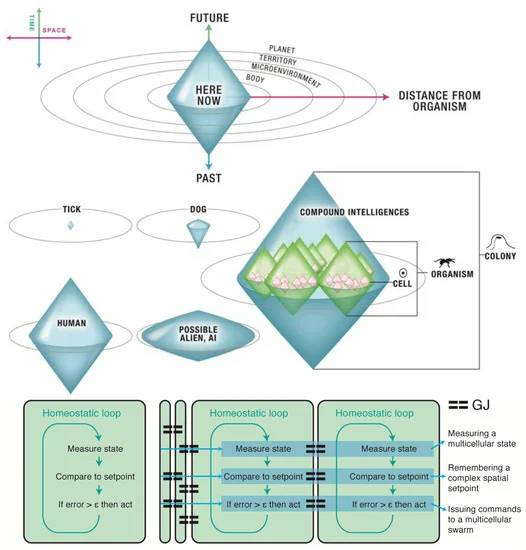

In [ ]:
#########################
### MULTIMODAL VISION ###
#########################

### INITIALIZATION
builder = AIBuilder()
question = "What is the cognitive light cone?"
image_path = "/workspace/ai-builder/assets/images/cognitive-light-cone.png"

### ANSWER QUESTION
response, metadata = builder.GPT4_Vision.ask(question, image_path)
# response = builder.LLaVA_Vision.ask(question, image_path)

In [ ]:
import json
import time
import requests
import sys



def ask(question, 
        image_path,
        system_prompt=None):
    model_url = f"https://96vv2ghebi762o-5000.proxy.runpod.net"
    builder = AIBuilder()
    
    ### SEND TO RUNPOD LLAVA MODEL
    payload = {
        'model_path': model_url,
        'image_base64': builder.Utilities.encode_image_to_base64(image_path),
        'prompt': question,
        'temperature': 0.1,
        'max_new_tokens': builder.max_tokens
    }
    timer = Timer()
    r = requests.post(
        f'{model_url}/inference',
        json=payload,
    )

    ### HANDLE RESPONSE
    if r.status_code == 200:
        text_response = r.json()["response"]
        return text_response
    else:
        print(f"Failed to get a valid response, status code: {r.status_code}")
        print(f"Response content: {r.text}")
        return None



In [ ]:

question = "What is the cognitive light cone?"
image_path = "/workspace/ai-builder/assets/images/cognitive-light-cone.png"
ask(question, image_path)